In [1]:
%load_ext autoreload
%autoreload 2

import math
import cmath
import numpy as np
import scipy
import sympy
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib import colors as m2colors
import seaborn as sns
from pylab import cm
import plotly
import plotly.graph_objects as go

import json
import os
import sys
import re

from MMfxns import *
from MMplotting import *
from pyDOE2 import lhs

cwd = os.getcwd()
sns.set(style="ticks", font_scale=1.5)

mcolors = dict(m2colors.BASE_COLORS, **m2colors.CSS4_COLORS)

saveall = True

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

pd.set_option('display.expand_frame_repr', False, 'display.max_columns', None)

{'tau_F': 12.0, 'tau_SG': 300.0, 'tau_SR': 300.0, 'kc': 1.05, 'km': 'stiff', 'm0': 6.05, 'x0': 1.15, 'a0': 0.82, 'xtt': 0.0, 'g': 38, 'n': 4.86, 'a_max': 10, 'time_resolution': 1.0, 'color': None, 'input_m': [], 'tau_R0': 160, 'TV0SR': 1.15, 'TV0SG': 1.15, 'dynamics': 'updated_exp', 'eps': (0.0, 1.0, 0.0), 'grid_resolution': 150}
--------
a_c = 1.623272, x_c = 0.917684, m_c in absolute = 5.839644
updated_exp
counts [ 24  72 360]
456
ids [1 2 1]
priming times 72.15824175824176
memory times 0.0
263.97532486495476 309.844150491836 314.4159783403695


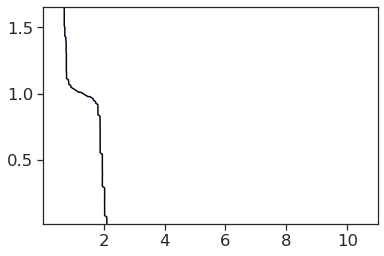

In [2]:
#### Energy dependent alpha increase and decrease

resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
#         params['tau'] = .98
        params['tau_F'] = 12. # params['tau'] * 2
        params['tau_SG'] = 300. #params['tau'] * 150
        params['tau_SR'] = params['tau_SG']
        
        params['kc'] = 1.05 # '-stiff' # 0.98 # 'linear' # 0.5 #'soft' 1.
        params['km'] = 'stiff'      
        params['m0'] = 6.05
        params['x0'] = 1.15; 
        params['a0'] = 0.82; params['xtt'] = 0.
        params['g'] = 38
        params['n'] = 4.86
        
        params['a_max'] = 10
        
        params['time_resolution'] = 1.
#         params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []
        
        params['tau_R0'] = 160 # params['tau_SG'] #* 2
#         params['TV0SR'] = 1.
#         params['TV0SG'] = 8.
        params['TV0SR'] = params['x0']
        params['TV0SG'] = params['x0']
        
        params['dynamics'] = 'updated_exp' # 'exp_dynamicTS'
        params['eps'] = (0., 1., 0.0) # mean, std, magnitude
        
        params['grid_resolution'] = 150
    
    return params

ins = np.array(
    [
        [24, 2.],
        [72, 10.],
        [360, 2.],
    ]
        )

# ins = np.array(
#     [
#         [24, 2.],
#         [172, 10.],
#         [48, 2.],
#         [48, 10.],
#         [200, 2.],
#     ]
#         )

params = set_params()
# params = set_params('./figures/figure4_dynamics_profiles/perm_mem_v2.png.json')
# ins = np.array(params['input_m'][0])

print(params)
resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)

mech_stats = np.abs(stiffP - stiffA) / params['m0']

params['a_c'] = params['a_c'].tolist()
print(np.amin(resultsDF['tSG']), np.mean(resultsDF['tSG']), np.amax(resultsDF['tSG']))
# print(resultsDF['active_region'])


timesteps per region: [ 24 172  48  48 200]
regions: [1 2 3 2 3]
24.048879837067208
['#f5793aff', '#1e88e5ff', '#0f2080ff']
profiles_updated_exp_multi_program_mem.png


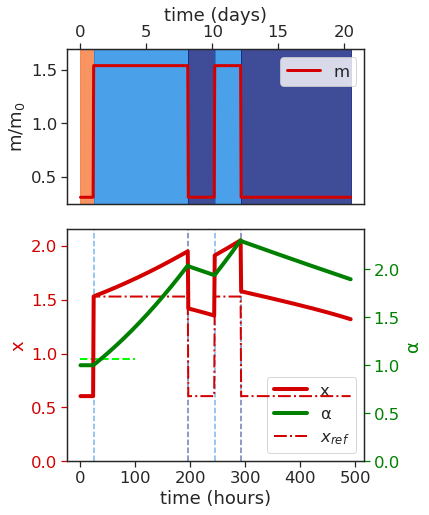

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(6.3,7.5), gridspec_kw={'height_ratios': [1., 1.5]})
# fig.suptitle('Energy Dependent \u03b1')

if resultsDF['active_region'].values[-1] == 2:
#     print('blue')
    params['color'] = (0., 0., 1.)
    fname1 = 'profiles_' + params['dynamics'] + "_perm_mem.png"
#     params['color'] = (212/255, 0., 0.)
elif 3 in pd.unique(resultsDF['active_region']):
#     print('red')
    params['color'] = (212/255, 0., 0.)
    fname1 = 'profiles_' + params['dynamics'] + "_temp_mem.png"
else:
#     print('pink')
    params['color'] = (1., 0., 1.)
    
    params['color'] = (102./255, 102./255, 102./255)
    fname1 = 'profiles_' + params['dynamics'] + "_no_mem.png"

params, fig, axs = plot_profile(fig, ax, resultsDF, params, x_equil, colors=['#f5793aff', '#1e88e5ff', '#0f2080ff'] )

# colors =  [mcolors['darkorange'], mcolors['red'], mcolors['navy'], mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']]
#  fig2,
params['input_m'].append(ins.tolist())

base_params = set_params()
base_params['input_m'].append(ins.tolist())

saveall = False
if saveall:
    direc = os.getcwd() + '/../figures_v3/figure4/'

#     fname1 = 'profiles_' + params['dynamics'] + "_multi_program_mem.png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(direc + fname1, format='png', dpi=600, transparent=True)
    
#     fname2 = 'PD_' + fname1
#     print(fname2)
#     fig2.savefig(direc + fname2, format='png', dpi=600)
#     params['eps'] = base_params['eps']
#     print([type(params[i]) for i in params.keys()])
    with open(direc+fname1 + '.json', 'w') as f:
        f.write(json.dumps(base_params))

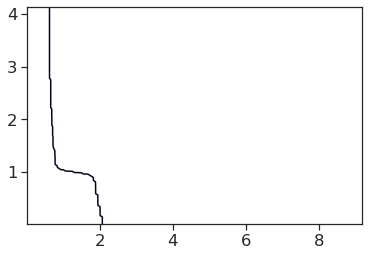

In [7]:
# params = {}
# params = set_params()

x_space = np.linspace(0, 8., params['grid_resolution'])
a_space = np.linspace(0.01, 5., params['grid_resolution'])
params['x_c'] = x_crit(params['n'])
m_space = np.linspace(0.05, 25., params['grid_resolution'])
params['m_space'] = m_space
params['grid_resolution'] = 150

U_data, U_mins, x_arr_max, gmin_overm, b1_overm, b2_overm, inf_overm, capture2minima, capture_mvals, capmax, barrier_heights = collect_minima(U, m_space, x_space, a_space, params)
mtst2, x_cvals, newlowlines, newhighlines = calc_PD_rates(params)

NameError: name 'a_ind' is not defined

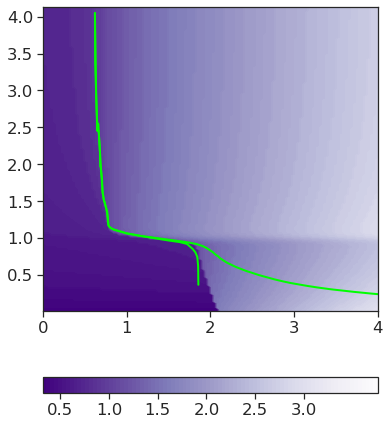

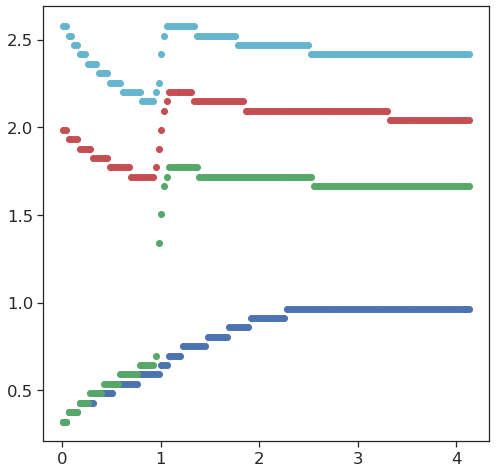

In [8]:
#### figure 4 heat map of equilibrium value of x




# res = 200


# # ac_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space-a_c)))[0]

# a_c = alpha_crit(m_space, params)
# m_c = scipy.optimize.fsolve(m_crit_general, 1.5, args=(params), xtol=1e-10)[0] / params['m0']
# params['a_c'] = a_c.tolist(); params['m_c'] = m_c

# # x_space = np.linspace(0, 5., res)
# # m_space = np.linspace(0.05,params['m_c']*3,res) * params['m0']
# # a_space = np.linspace(0.01, params['a_c']*3, res)
# # print(np.amax(m_space))
# a_ind = np.where(np.abs(a_space - a_c) == np.amin(np.abs(a_space - a_c)))[0]

# U_data = np.zeros((len(x_space), len(a_space), len(m_space)))
# for mi, mm in enumerate(m_space):
#     for ai, aa in enumerate(a_space):
#         for xi, xx in enumerate(x_space):
#             U_data[xi, ai, mi] = U(f_m, mm, xx, aa, params)

# x_arr_max = np.zeros((res,res))
# x_arr_min = np.zeros((res,res))
# m0coords = []; m1coords = []; m2coords = []
# for mi, mm in enumerate(m_space):
#     for ai, aa in enumerate(a_space):
#         xargs = find_peaks(-np.abs(np.diff(U_data[:,ai,mi])))[0]
#         Utest = U_data[xargs,ai,mi]        
#         xmins = x_space[xargs]
        
#         if len(xmins) > 0:
#             x_arr_max[mi, ai] = xmins[np.argmin(Utest)]
#             x_arr_min[mi, ai] = np.amin(xmins) # xmins[np.argmin(Utest)]
#         else:
#             try:
#                 x_arr_max[mi, ai] = np.amax(xmins)
# #                 x_arr_min[mi, ai] = np.amin(xmins)
#             except:
#                 x_arr_max[mi, ai] = 0.
# #                 x_arr_min[mi, ai] = 0.

fig, ax = plt.subplots(1,1, figsize=(6,8))

## absolute m
# cf = ax.contourf(a_space, m_space, x_arr, levels=100, cmap=cm.Purples_r)
# ylims = ax.get_ylim()
# ax.plot([params['a_c'], params['a_c']],[np.amin(m_space), params['m_c']*params['m0']*2], mcolors['green'], linewidth=3.5, linestyle='-.', label='\u03b1$_{c}$')
# ax.plot([np.amin(a_space), np.amax(a_space)], [params['m_c']*params['m0'], params['m_c']*params['m0']], mcolors['deeppink'], linewidth=3.5, linestyle='-.', lab

## m over m0
cf = ax.contourf(a_space, m_space / params['m0'], x_arr_max, levels=100, cmap=cm.Purples_r)
ylims = ax.get_ylim()
# ax.plot(params['a_c'], m_space, mcolors['green'], linewidth=3.5, linestyle='-.', label='\u03b1$_{c}$')
# ax.plot([np.amin(a_space), np.amax(a_space)], [params['m_c'], params['m_c']], mcolors['deeppink'], linewidth=3.5, linestyle='-.', label='m$_{c}$')

ax.set_ylim(ylims)
ax.set_xlim([0.,4.])

# cb = plt.colorbar(cf, ax=ax, format='%.2f', orientation='horizontal')
cb = plt.colorbar(cf, ax=ax, ticks=[0., 0.,0.5,1.,1.5,2.,2.5,3.], orientation='horizontal')
# tick_locator = ticker.MaxNLocator(nbins=6)
# cb.locator = tick_locator
# cb.update_ticks()

ax.plot(newlowlines[:,0], newlowlines[:,1], color=mcolors['lime'], linewidth=2)
ax.plot(newhighlines[:,0], newhighlines[:,1], color=mcolors['lime'], linewidth=2)
# ax.plot(x_cvals[:,0], x_cvals[:,1], color=mcolors['lime'])



randcurves = np.floor(np.linspace(0, np.amax(a_space), 4))
randcurves = np.array([20,50,75,99])
fig3, ax3 = plt.subplots(1,1, figsize=(8,8))

colors = ['b','g','r','c','y','k']

for di, dd in enumerate(randcurves):
    
    ax3.scatter(m_space / params['m0'], x_arr_max[:,int(dd)], color=colors[di])
ax3.scatter(m_space / params['m0'], x_arr_max[:,a_ind], color=colors[di+1])

for di, dd in enumerate(randcurves):
    
    ax3.scatter(m_space / params['m0'], x_arr_min[:,int(dd)], color=colors[di])
ax3.scatter(m_space / params['m0'], x_arr_min[:,a_ind], color=colors[di+1])


plt.show()


# fig2, ax2 = plt.subplots(1,1, figsize=(6,6))
# baseline = f_m(m_space, params)
# cf2 = ax2.contourf(a_space, m_space, x_arr_max - baseline[:,np.newaxis], levels=100, cmap=cm.Purples_r)
# plt.colorbar(cf, ax=ax2)
base_params = set_params()
saveall = False
if saveall:
    direc = os.getcwd() + '/../figures_v3/figure4/'

    fname1 = direc + "x_global_min_overlay_phasediagram_values_v1.png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(fname1, format='png', dpi=600, transparent=True)
    
    with open(fname1 + '.json', 'w') as f:
        f.write(json.dumps(base_params))


In [52]:
#### Energy dependent alpha increase and decrease

resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
#         params['tau'] = .98
        params['tau_F'] = 12. # params['tau'] * 2
        params['tau_SG'] = 300. #params['tau'] * 150
        params['tau_SR'] = params['tau_SG']
        
        params['kc'] = .9 # '-stiff' # 0.98 # 'linear' # 0.5 #'soft' 1.
        params['km'] = 'stiff'      
        params['m0'] = 6.8
        params['x0'] = 2.; 
        params['a0'] = 0.33; params['xtt'] = 0.
        params['g'] = 33.5
        params['n'] = 4.1
        
        params['a_max'] = 15
        
        params['time_resolution'] = 1.
#         params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []
        
        params['tau_R0'] = 207 # params['tau_SG'] #* 2
#         params['TV0SR'] = 1.
#         params['TV0SG'] = 8.
        params['TV0SR'] = params['x0']
        params['TV0SG'] = params['x0']
        
        params['dynamics'] = 'updated_exp' # 'exp_dynamicTS'
        params['eps'] = (0., 1., 0.0) # mean, std, magnitude
        
        params['grid_resolution'] = 150
    
    return params

ins = np.array(
    [
        [24, 2.],
        [180, 10.],
        [360, 2.],
    ]
        )

params = set_params()
# params = set_params('./figures/figure4_dynamics_profiles/perm_mem_v2.png.json')
# ins = np.array(params['input_m'][0])

print(params)
params['x_c'] = x_crit(params['n']);
m_profile = build_mprof(ins, params['time_resolution'])
params['m_space'] = np.linspace(np.amin([0.1, np.amin(m_profile)]), np.amax(m_profile)*1., int(params['grid_resolution']))
m_c = scipy.optimize.fsolve(m_crit_general, 0.5, args=(params), xtol=1e-10)[0] / params['m0']
params['m_c'] = m_c
print(m_c)
params['a_c'] = alpha_crit(params['m_space'], params);
calc_PD_rates(params, display = True)
# resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)

# mech_stats = np.abs(stiffP - stiffA) / params['m0']

# params['a_c'] = params['a_c'].tolist()
# print(np.amin(resultsDF['tSG']), np.mean(resultsDF['tSG']), np.amax(resultsDF['tSG']))
# print(resultsDF['active_region'])


{'tau_F': 12.0, 'tau_SG': 300.0, 'tau_SR': 300.0, 'kc': 0.9, 'km': 'stiff', 'm0': 6.8, 'x0': 2.0, 'a0': 0.33, 'xtt': 0.0, 'g': 33.5, 'n': 4.1, 'a_max': 15, 'time_resolution': 1.0, 'color': None, 'input_m': [], 'tau_R0': 207, 'TV0SR': 2.0, 'TV0SG': 2.0, 'dynamics': 'updated_exp', 'eps': (0.0, 1.0, 0.0), 'grid_resolution': 150}
-0.11720525762299287
m_c exit?-0.11720525762299287
{'tau_F': 12.0, 'tau_SG': 300.0, 'tau_SR': 300.0, 'kc': 0.9, 'km': 'stiff', 'm0': 6.8, 'x0': 2.0, 'a0': 0.33, 'xtt': 0.0, 'g': 33.5, 'n': 4.1, 'a_max': 15, 'time_resolution': 1.0, 'color': None, 'input_m': [], 'tau_R0': 207, 'TV0SR': 2.0, 'TV0SG': 2.0, 'dynamics': 'updated_exp', 'eps': (0.0, 1.0, 0.0), 'grid_resolution': 150, 'x_c': 0.8856583547265089, 'm_space': array([ 0.1       ,  0.16644295,  0.23288591,  0.29932886,  0.36577181,
        0.43221477,  0.49865772,  0.56510067,  0.63154362,  0.69798658,
        0.76442953,  0.83087248,  0.89731544,  0.96375839,  1.03020134,
        1.0966443 ,  1.16308725,  1.229

([], [], [], [])

{'tau_F': 12.0, 'tau_SG': 300.0, 'tau_SR': 600.0, 'kc': 1.5, 'km': 'stiff', 'm0': 6.5, 'x0': 1.9, 'a0': 1.0, 'xtt': 0.0, 'g': 35, 'n': 6.0, 'a_max': 10, 'time_resolution': 1.0, 'color': None, 'input_m': [], 'tau_R0': 150, 'TV0SR': 1.9, 'TV0SG': 1.9, 'dynamics': 'updated_exp_staticTS', 'eps': (0.0, 1.0, 0.0), 'grid_resolution': 150}
--------
a_c = 1.508742, x_c = 0.945465, m_c in absolute = 3.621481
updated_exp_staticTS
counts [ 24 220  93 267]
604
ids [1 2 3 1]
priming times 220.3648424543947
memory times 93.1542288557214
300.0 300.0 300.0


/home/ccprice/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

/home/ccprice/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.



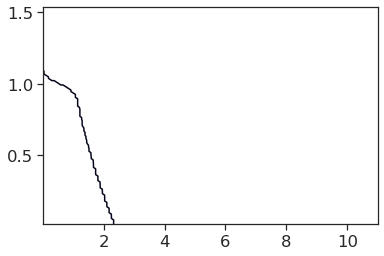

In [44]:
#### Energy dependent alpha increase and decrease

resultsDF = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])
resultsDF2 = pd.DataFrame(columns=['m_profile','t_space','x_prof','alpha_prof','active_region','deltaV'])

def set_params(file=None):
    params = {}
    if file:
        with open(file, 'r') as f:
            params = json.load(f)
    else:
#         params['tau'] = .98
        params['tau_F'] = 12. # params['tau'] * 2
        params['tau_SG'] = 300. #params['tau'] * 150
        params['tau_SR'] = 600. #params['tau_SG']
        
        params['kc'] = 1.5 # '-stiff' # 0.98 # 'linear' # 0.5 #'soft' 1.
        params['km'] = 'stiff'      
        params['m0'] = 6.5
        params['x0'] = 1.9; 
        params['a0'] = 1.; params['xtt'] = 0.
        params['g'] = 35
        params['n'] = 6.
        
        params['a_max'] = 10
        
        params['time_resolution'] = 1.
#         params['type'] = 'stiff'
        params['color'] = None
        params['input_m'] = []
        
        params['tau_R0'] = 150 # params['tau_SG'] #* 2
#         params['TV0SR'] = 1.
#         params['TV0SG'] = 8.
        params['TV0SR'] = params['x0']
        params['TV0SG'] = params['x0']
        
        params['dynamics'] = 'updated_exp_staticTS' # 'exp_dynamicTS'
        params['eps'] = (0., 1., 0.0) # mean, std, magnitude
        
        params['grid_resolution'] = 150
    
    return params

ins = np.array(
    [
        [24, 2.],
        [220, 10.],
        [360, 2.],
    ]
        )

params = set_params()
# params = set_params('./figures/figure4_dynamics_profiles/perm_mem_v2.png.json')
# ins = np.array(params['input_m'][0])

print(params)
resultsDF, params, priming_times, memory_times, stiffP, stiffA = run_profile(integrate_profile, ins, params, resultsDF)

mech_stats = np.abs(stiffP - stiffA) / params['m0']

params['a_c'] = params['a_c'].tolist()
print(np.amin(resultsDF['tSG']), np.mean(resultsDF['tSG']), np.amax(resultsDF['tSG']))
# print(resultsDF['active_region'])


timesteps per region: [ 24 220  93 267]
regions: [1 2 3 1]
24.039800995024876
['#f5793aff', '#1e88e5ff', '#0f2080ff']


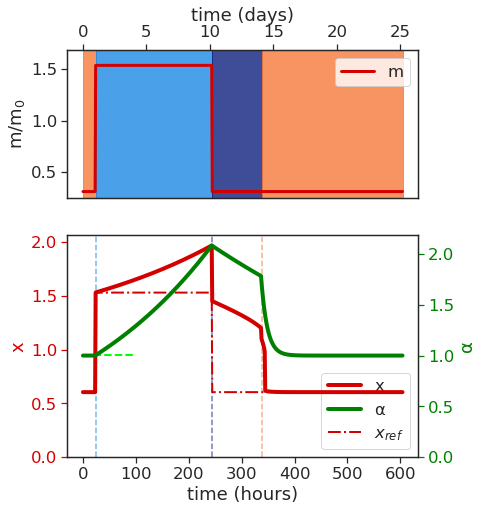

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(6.3,7.5), gridspec_kw={'height_ratios': [1., 1.5]})
# fig.suptitle('Energy Dependent \u03b1')

if resultsDF['active_region'].values[-1] == 2:
#     print('blue')
    params['color'] = (0., 0., 1.)
    fname1 = 'profiles_' + params['dynamics'] + "_perm_mem.png"
#     params['color'] = (212/255, 0., 0.)
elif 3 in pd.unique(resultsDF['active_region']):
#     print('red')
    params['color'] = (212/255, 0., 0.)
    fname1 = 'profiles_' + params['dynamics'] + "_temp_mem.png"
else:
#     print('pink')
    params['color'] = (1., 0., 1.)
    
    params['color'] = (102./255, 102./255, 102./255)
    fname1 = 'profiles_' + params['dynamics'] + "_no_mem.png"

params, fig, axs = plot_profile(fig, ax, resultsDF, params, x_equil, colors=['#f5793aff', '#1e88e5ff', '#0f2080ff'] )

# colors =  [mcolors['darkorange'], mcolors['red'], mcolors['navy'], mcolors['navy'], mcolors['springgreen'], mcolors['springgreen']]
#  fig2,
params['input_m'].append(ins.tolist())

base_params = set_params()
base_params['input_m'].append(ins.tolist())

saveall = False
if saveall:
    direc = os.getcwd() + '/../figures_v3/figure4/'

#     fname1 = 'profiles_' + params['dynamics'] + "_perm_mem.png"
    print(fname1)
    fig.tight_layout()
    fig.savefig(direc + fname1, format='png', dpi=600, transparent=True)
    
#     fname2 = 'PD_' + fname1
#     print(fname2)
#     fig2.savefig(direc + fname2, format='png', dpi=600)
#     params['eps'] = base_params['eps']
#     print([type(params[i]) for i in params.keys()])
    with open(direc+fname1 + '.json', 'w') as f:
        f.write(json.dumps(base_params))